In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
os.chdir('data')

In [3]:
[file for file in os.listdir() if(file.endswith('.csv'))]

['Median Incomes.csv',
 'Median Monthly Rent.csv',
 'Home Ownership.csv',
 'Total Population.csv',
 'Uninsured.csv',
 'Unemployment Rate.csv',
 'Severe Rent Burden.csv',
 'Educational Attainment.csv',
 'Overcrowded Rental Housing.csv',
 'SNAP (Food Stamps).csv',
 'Household Income.csv',
 'Public Assistance.csv',
 'Employment Population Ratio.csv',
 'Total Population by Race_Ethnicity.csv']

In [4]:
dfs = {}
for file in os.listdir():
    if (file.endswith('.csv')):
        key = file[:-4].replace(' ', '_').lower()
        #print(key)
        dfs[key] = pd.read_csv(file, skiprows=4, encoding='utf8', low_memory=False)
        #print(f"{key} - {sorted(set(dfs[key]['TimeFrame'].tolist()))}")

In [5]:
dfs.keys()

dict_keys(['median_incomes', 'median_monthly_rent', 'home_ownership', 'total_population', 'uninsured', 'unemployment_rate', 'severe_rent_burden', 'educational_attainment', 'overcrowded_rental_housing', 'snap_(food_stamps)', 'household_income', 'public_assistance', 'employment_population_ratio', 'total_population_by_race_ethnicity'])

In [ ]:
for key in dfs.keys():
    print(f'{key} - {dfs[key].columns.tolist()}')
    print(sorted(dfs[key]['TimeFrame'].value_counts().index))

In [ ]:
for key in dfs.keys():
    if('Number' in list(set(dfs[key]['DataFormat'].tolist())) ):
        print(key)
        

In [6]:
standard = {}
extra = {}
for key in dfs.keys():
    if(dfs[key].columns[1] == 'TimeFrame' and key != 'public_assistance'):
        print(f'{key} - {dfs[key].columns.tolist()}')
        standard[key] = dfs[key]
        if(key == 'total_population'):
            standard[key] = dfs[key][~dfs[key].Fips.str.contains('uhf')]
            standard[key].Fips = standard[key].Fips.astype(int)
        if(key == 'median_monthly_rent'):
            standard[key]['DataFormat'] = 'Number'
    else:
        extra[key] = dfs[key]
    #print(dfs[key].head(2))

median_monthly_rent - ['Location', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
home_ownership - ['Location', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
total_population - ['Location', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
unemployment_rate - ['Location', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
severe_rent_burden - ['Location', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
overcrowded_rental_housing - ['Location', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
employment_population_ratio - ['Location', 'TimeFrame', 'DataFormat', 'Data', 'Fips']


/Users/tavares/opt/anaconda3/envs/PythonML/lib/python3.6/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [7]:
print('standard: ', list(standard.keys()))
print('')
print('extra: ', list(extra.keys()))

standard:  ['median_monthly_rent', 'home_ownership', 'total_population', 'unemployment_rate', 'severe_rent_burden', 'overcrowded_rental_housing', 'employment_population_ratio']

extra:  ['median_incomes', 'uninsured', 'educational_attainment', 'snap_(food_stamps)', 'household_income', 'public_assistance', 'total_population_by_race_ethnicity']


In [8]:
df = standard['median_monthly_rent'][['TimeFrame','Fips','Location']]

In [9]:
df = df.merge(standard['total_population'][['TimeFrame','Fips','Data']].rename(columns={'Data':'Population'}),on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

In [10]:
df = df.merge(standard['median_monthly_rent'][['TimeFrame','Fips','Data']].rename(columns={'Data':'Rent'}),on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

In [11]:
df = df.merge(standard['severe_rent_burden'][['TimeFrame','Fips','Data']].rename(columns={'Data':'Rent_Burden'}),on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)
df = df.merge(standard['overcrowded_rental_housing'][['TimeFrame','Fips','Data']].rename(columns={'Data':'Overcrowded'}),on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

In [12]:
df = df.merge(standard['home_ownership'][['TimeFrame','Fips','Data']].rename(columns={'Data':'Owner'}),on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

In [13]:
df = df.merge(standard['employment_population_ratio'][['TimeFrame','Fips','Data']].rename(columns={'Data':'Employment_Ratio'}),on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)
df = df.merge(standard['unemployment_rate'][['TimeFrame','Fips','Data']].rename(columns={'Data':'Unemployment'}),on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

In [14]:
print(df.shape)
df.head()

(910, 10)


,TimeFrame,Fips,Location,Population,Rent,Rent_Burden,Overcrowded,Owner,Employment_Ratio,Unemployment
0,2005,101,Battery Park/Tribeca,51150.45963,2191.21645,0.17644,0.03794,0.26053,0.751,0.033
1,2005,102,Greenwich Village,75508.54037,2191.21645,0.17644,0.03794,0.26053,0.751,0.033
2,2005,103,Lower East Side,145556.00000,817.19484,0.23809,0.08153,0.13708,0.564,0.088
3,2005,104,Chelsea/Clinton,88754.39184,1781.33008,0.19318,0.04339,0.20554,0.677,0.066
4,2005,105,Midtown Business District,44420.60816,1781.33008,0.19318,0.04339,0.20554,0.677,0.066


In [15]:
for key in extra:
    print(f'{key} - {extra[key].columns.tolist()}')

median_incomes - ['Location', 'Household Type', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
uninsured - ['Location', 'Age Group', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
educational_attainment - ['Location', 'Education Level', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
snap_(food_stamps) - ['Location', 'Recipient', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
household_income - ['Location', 'Income Level', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
public_assistance - ['Location', 'TimeFrame', 'DataFormat', 'Data', 'Fips']
total_population_by_race_ethnicity - ['Location', 'Race/Ethnicity', 'TimeFrame', 'DataFormat', 'Data', 'Fips']


In [16]:
median_incomes = extra['median_incomes'][extra['median_incomes']['Household Type']=='All Households']
median_incomes = median_incomes[['TimeFrame','Fips','DataFormat','Data']].set_index(['TimeFrame','Fips','DataFormat']).unstack()
median_incomes.columns = ['Median_Income']
#median_incomes['Type'] = 'median_income'
median_incomes = median_incomes.reset_index()
print(median_incomes.shape)
median_incomes.head()
df = df.merge(median_incomes,on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

(910, 3)


In [17]:
uninsured = extra['uninsured'][extra['uninsured']['Age Group']=='All Ages']
uninsured = uninsured[['TimeFrame','Fips','DataFormat','Data']].set_index(['TimeFrame','Fips','DataFormat']).unstack()
uninsured.columns = ['Uninsured_No','Uninsured_Pct']
#uninsured['Type'] = 'uninsured'
uninsured = uninsured.reset_index()
print(uninsured.shape)
uninsured.head()
df = df.merge(uninsured,on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

(715, 4)


In [18]:
education = extra['educational_attainment']
education = education[['TimeFrame','Fips','Education Level','DataFormat','Data']]
education = education[education['Education Level'].str.contains('Bachelor')]
education = education.set_index(['TimeFrame','Fips','Education Level','DataFormat']).unstack()
education.columns = ['Education_No','Education_Pct']
#education['Type'] = 'education'
education = education.reset_index().rename(columns={'Education Level': 'Education_Level'})
print(education.shape)
education.head()
df = df.merge(education,on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

(845, 5)


In [19]:
snap = extra['snap_(food_stamps)'][extra['snap_(food_stamps)']['Recipient']=='Households']
snap = snap[['TimeFrame','Fips','DataFormat','Data']].set_index(['TimeFrame','Fips','DataFormat']).unstack()
snap.columns = ['Snap_No','Snap_Pct']
#snap['Type'] = 'snap'
snap = snap.reset_index()
print(snap.shape)
snap.head()
df = df.merge(snap,on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

(715, 4)


In [ ]:
#df.to_csv('../data.csv')

In [ ]:
df.shape

In [ ]:
households = extra['household_income']
households = households[['TimeFrame','Fips','Income Level','DataFormat','Data']].set_index(['TimeFrame','Fips','Income Level','DataFormat']).unstack()
households.columns = ['Income_No','Income_Pct']
#households['Type'] = 'household_income'
households = households.reset_index().rename(columns={'Income Level': 'Income_Level'})
print(households.shape)
households.head()
df = df.merge(households,on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

In [ ]:
public_assistance = extra['public_assistance']
public_assistance = public_assistance[['TimeFrame','Fips','DataFormat','Data']].set_index(['TimeFrame','Fips','DataFormat']).unstack()
public_assistance.columns = ['PA_No','PA_Pct']
#public_assistance['Type'] = 'public_assistance'
public_assistance = public_assistance.reset_index()
print(public_assistance.shape)
public_assistance.head()
df = df.merge(public_assistance,on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

In [ ]:
pop_by_race = extra['total_population_by_race_ethnicity']
pop_by_race = pop_by_race[['TimeFrame','Fips','Race/Ethnicity','DataFormat','Data']].set_index(['TimeFrame','Fips','Race/Ethnicity','DataFormat']).unstack()
pop_by_race.columns = ['Race_No','Race_Pct']
#pop_by_race['Type'] = 'population_by_race'
pop_by_race = pop_by_race.reset_index().rename(columns={'Race/Ethnicity': 'Race'})
print(pop_by_race.shape)
pop_by_race.head()
df = df.merge(pop_by_race,on=['TimeFrame','Fips'],how='left', left_index=False, right_index=False)

In [ ]:
sorted(pop_by_race['TimeFrame'].value_counts().index)

In [20]:
print(df.shape)
print(sorted(df['TimeFrame'].value_counts().index))
print(df.columns.tolist())
df.head(10)

(910, 18)
[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
['TimeFrame', 'Fips', 'Location', 'Population', 'Rent', 'Rent_Burden', 'Overcrowded', 'Owner', 'Employment_Ratio', 'Unemployment', 'Median_Income', 'Uninsured_No', 'Uninsured_Pct', 'Education_Level', 'Education_No', 'Education_Pct', 'Snap_No', 'Snap_Pct']


,TimeFrame,Fips,Location,Population,Rent,Rent_Burden,Overcrowded,Owner,Employment_Ratio,Unemployment,Median_Income,Uninsured_No,Uninsured_Pct,Education_Level,Education_No,Education_Pct,Snap_No,Snap_Pct
0,2005,101,Battery Park/Tribeca,51150.45963,2191.21645,0.17644,0.03794,0.26053,0.751,0.033,116703.49427,NaN,NaN,NaN,NaN,NaN,1198.0,0.04744
1,2005,102,Greenwich Village,75508.54037,2191.21645,0.17644,0.03794,0.26053,0.751,0.033,116703.49427,NaN,NaN,NaN,NaN,NaN,2525.0,0.05822
2,2005,103,Lower East Side,145556.00000,817.19484,0.23809,0.08153,0.13708,0.564,0.088,40241.54525,NaN,NaN,NaN,NaN,NaN,14828.0,0.21802
3,2005,104,Chelsea/Clinton,88754.39184,1781.33008,0.19318,0.04339,0.20554,0.677,0.066,88613.25358,NaN,NaN,NaN,NaN,NaN,8107.0,0.15767
4,2005,105,Midtown Business District,44420.60816,1781.33008,0.19318,0.04339,0.20554,0.677,0.066,88613.25358,NaN,NaN,NaN,NaN,NaN,2266.0,0.09024
5,2005,106,Murray Hill/Stuyvesant,146269.00000,1890.89090,0.16781,0.03378,0.30420,0.711,0.041,108133.93078,NaN,NaN,NaN,NaN,NaN,2279.0,0.02679
6,2005,107,Upper West Side,208708.00000,1439.75810,0.20799,0.03900,0.33113,0.675,0.055,105587.91925,NaN,NaN,NaN,NaN,NaN,9115.0,0.08764
7,2005,108,Upper East Side,211724.00000,1921.82572,0.17937,0.02360,0.37111,0.667,0.045,103965.90401,NaN,NaN,NaN,NaN,NaN,2465.0,0.02173
8,2005,109,Manhattanville,114405.00000,846.84071,0.27210,0.06431,0.16545,NaN,NaN,35106.83757,NaN,NaN,NaN,NaN,NaN,11935.0,0.25489
9,2005,110,Central Harlem,118291.00000,779.81527,0.23218,0.07432,0.08460,NaN,NaN,33587.76757,NaN,NaN,NaN,NaN,NaN,14107.0,0.29621


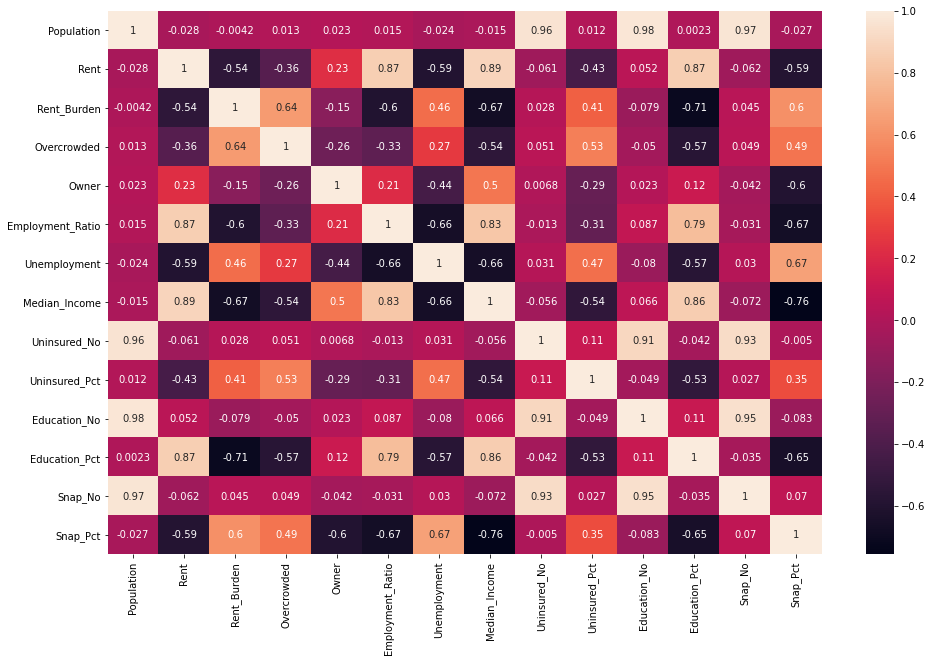

In [21]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = df[df.columns[2:]].corr()
plt.figure(figsize=(16,10))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [23]:
corrMatrix['Rent'].sort_values(ascending=False)

Rent                1.000000
Median_Income       0.890560
Education_Pct       0.867693
Employment_Ratio    0.867606
Owner               0.226082
Education_No        0.051541
Population         -0.027743
Uninsured_No       -0.060854
Snap_No            -0.062212
Overcrowded        -0.360327
Uninsured_Pct      -0.430552
Rent_Burden        -0.543363
Snap_Pct           -0.590771
Unemployment       -0.592704
Name: Rent, dtype: float64

In [ ]:
"""
for col in corrMatrix.columns:
    print(f'{col}:')
    print(corrMatrix[col].sort_values(ascending=False))
    print('\n')
"""

In [ ]:
"""
median_incomes - 2005-2018
monthly_rent - 2009-2018
arrests - 2000-2019
child_population_by_race_ethnicity - 2005-2018
median_monthly_rent - 2005-2018
home_ownership - 2005-2018
total_population - 2005-2018
child_population - 2005-2018
uninsured - 2008-2018
public_assistance_by_program_type - 2005-2017
unemployment_rate_ - 2005-2018
severe_rent_burden - 2005- 2018
educational_attainment - 2006-2018
overcrowded_rental_housing - 2005-2018
snap_(food_stamps) - 2001-2019
household_income - 2005-2018
public_assistance - 2005-2017
employment_population_ratio - 2005-2018
total_population_by_race_ethnicity - 2009-2018
"""

In [ ]:
#df.to_csv('../data.csv')

In [25]:
df.columns[3:]

Index(['Population', 'Rent', 'Rent_Burden', 'Overcrowded', 'Owner',
       'Employment_Ratio', 'Unemployment', 'Median_Income', 'Uninsured_No',
       'Uninsured_Pct', 'Education_Level', 'Education_No', 'Education_Pct',
       'Snap_No', 'Snap_Pct'],
      dtype='object')

In [26]:
d = df[['TimeFrame','Fips','Population','Rent','Rent_Burden','Overcrowded','Employment_Ratio','Unemployment','Median_Income']].drop_duplicates().dropna()
d.Population = d.Population.round(2)

In [27]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905 entries, 0 to 909
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TimeFrame         905 non-null    int64  
 1   Fips              905 non-null    int64  
 2   Population        905 non-null    float64
 3   Rent              905 non-null    float64
 4   Rent_Burden       905 non-null    float64
 5   Overcrowded       905 non-null    float64
 6   Employment_Ratio  905 non-null    float64
 7   Unemployment      905 non-null    float64
 8   Median_Income     905 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 70.7 KB


In [ ]:
print(df.Location.value_counts())
print(df.Education_Level.value_counts())
print(df.Income_Level.value_counts())
print(df.Race.value_counts())

In [ ]:
df.describe()

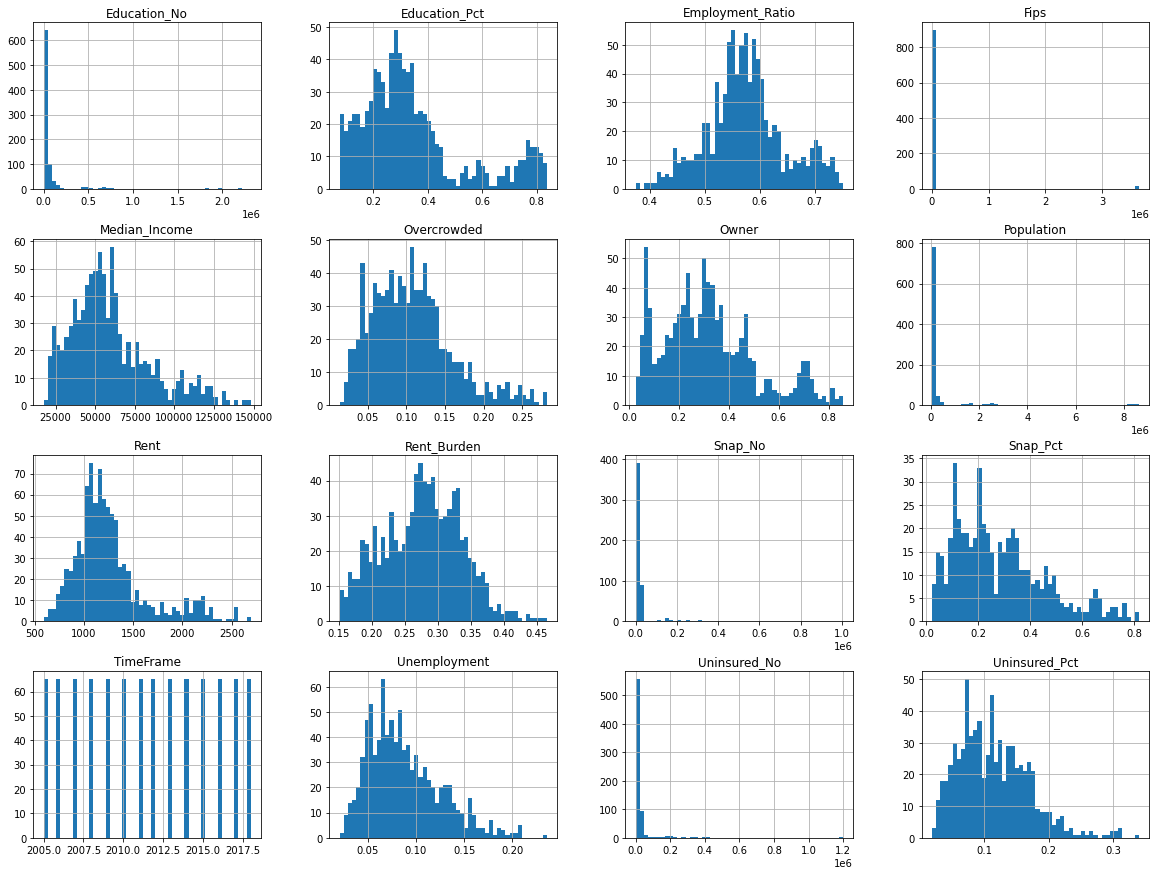

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
list(set(df.Income_Level))

In [57]:
bins=[0.,14999.0,24999.0,34999.0,49999.0,74999.0,99999.0,199999.0,np.inf]
print(bins)

[0.0, 14999.0, 24999.0, 34999.0, 49999.0, 74999.0, 99999.0, 199999.0, inf]


In [58]:
labels=[
    'Under $15,000',
    '$15,000 to $24,999',
    '$25,000 to $34,999',
    '$35,000 to $49,999',
    '$50,000 to $74,999',
    '$75,000 to $99,999',
    '$100,000 to $199,999',
    '$200,000 or more'
    ]
print(labels)

['Under $15,000', '$15,000 to $24,999', '$25,000 to $34,999', '$35,000 to $49,999', '$50,000 to $74,999', '$75,000 to $99,999', '$100,000 to $199,999', '$200,000 or more']


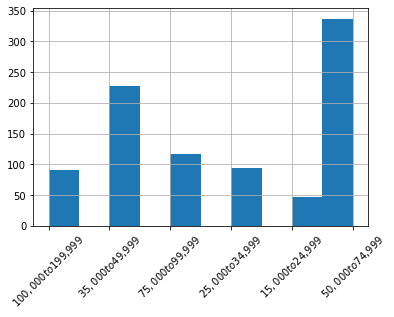

In [60]:
levels = pd.cut(df['Median_Income'],bins=bins,labels=labels)

levels.hist()
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['Income_Level']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

strat_test_set['Income_Level'].value_counts() / len(strat_test_set)


In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('Income_Level', axis=1, inplace=True)
strat_train_set

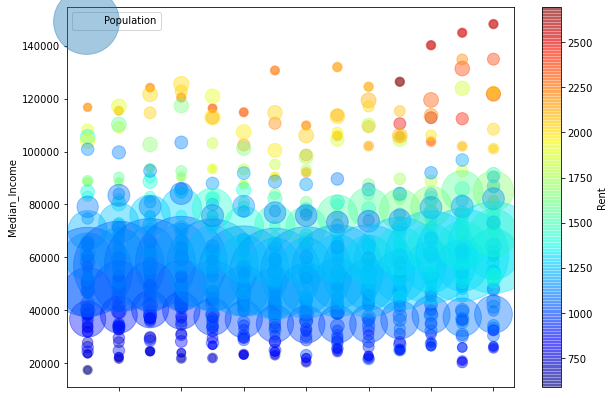

In [61]:
#df2 = strat_train_set.copy()
df.plot(kind='scatter', x='TimeFrame', y='Median_Income', alpha=0.4,
             s=df['Population']/1000, label='Population', figsize=(10,7),
             c='Rent', cmap=plt.get_cmap('jet'), colorbar=True)

plt.legend()

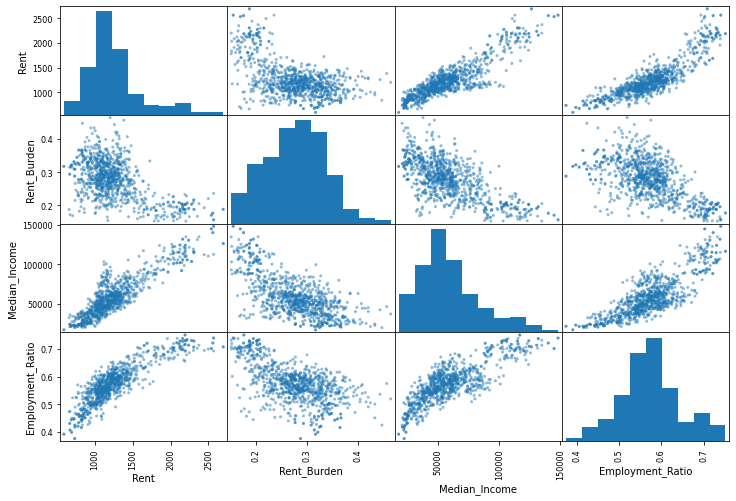

In [30]:
from pandas.plotting import scatter_matrix

attributes = ['Rent', 'Rent_Burden', 'Median_Income', 'Employment_Ratio']

scatter_matrix(df[attributes], figsize=(12,8))

plt.show()

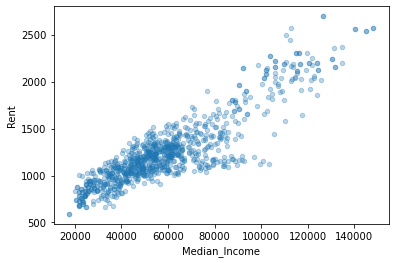

In [34]:
df.plot(kind='scatter', 
              x='Median_Income', 
              y='Rent', 
              alpha=0.3)

plt.show()

In [ ]:
df2 = strat_train_set[['TimeFrame',
           'Fips',
           'Population',
           'Rent_Burden',
           'Median_Income',
           'Employment_Ratio',
           'Unemployment']]
df2_labels = strat_train_set['Rent'].copy()

In [ ]:
print(df2.shape)
df2.head(2)

## Data Cleaning

In [41]:
# Replacing missing values with the median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df2 = df[['Rent','Population',
           'Rent_Burden',
           'Median_Income',
           'Employment_Ratio',
           'Unemployment']]
imputer.fit(df2)
print(imputer.statistics_)
X = imputer.transform(df2)
df_tr = pd.DataFrame(X, columns=df2.columns, index=df2.index)
df_tr.head()

[1.17465836e+03 1.41176000e+05 2.78285000e-01 5.43633686e+04
 5.71000000e-01 8.16200000e-02]


,Rent,Population,Rent_Burden,Median_Income,Employment_Ratio,Unemployment
0,2191.21645,51150.45963,0.17644,116703.49427,0.751,0.033
1,2191.21645,75508.54037,0.17644,116703.49427,0.751,0.033
2,817.19484,145556.00000,0.23809,40241.54525,0.564,0.088
3,1781.33008,88754.39184,0.19318,88613.25358,0.677,0.066
4,1781.33008,44420.60816,0.19318,88613.25358,0.677,0.066


### Machine Learning Algorithm

In [161]:
# Assign the data to X and y
col = 'Unemployment'
columns = ['Rent',col]
#columns = ['Rent','Population','Rent_Burden','Median_Income','Employment_Ratio', 'Unemployment']
d = df[columns].dropna()
X = d[columns[1:]]
y = d['Rent'].values.reshape(-1, 1)
print(X.shape, y.shape)

(907, 1) (907, 1)


In [162]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)

(634, 1)
(273, 1)


In [163]:
# Create a simple 1 variable model using LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [164]:
# Fit the model to the training data and calculate the scores for the training and testing data

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.35283237922724087
Testing Score: 0.3436603417528832


Text(0.5, 1.0, 'Residual Plot')

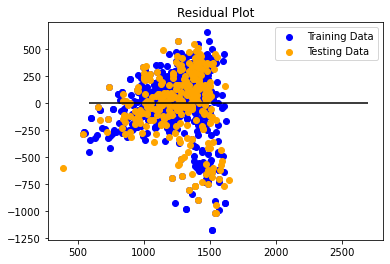

In [165]:
# Plot the Residuals for the Training and Testing data
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")


### StandardScaler

In [166]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [167]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

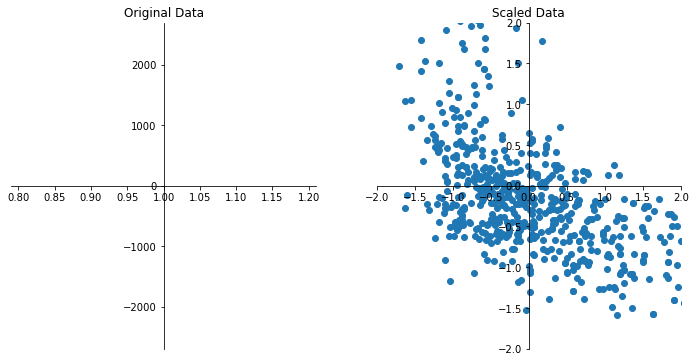

In [168]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train[col].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train[col], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

plt.show()

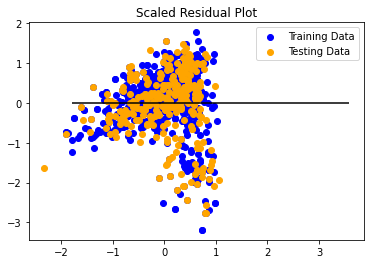

In [169]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Scaled Residual Plot")
plt.show()

In [170]:
# Quantify the model using the scaled data
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.7232755469926534, R2: 0.3436603417528834


## Categorical Attributes

In [ ]:
income_cat = df[['Income_Level']]
income_cat.head(10)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
income_cat_encoded = ordinal_encoder.fit_transform(income_cat)
income_cat_encoded[:10]

In [ ]:
ordinal_encoder.categories_

### One-Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
income_cat_1hot = cat_encoder.fit_transform(income_cat)
income_cat_1hot
print(cat_encoder.categories_)
income_cat_1hot.toarray()

In [ ]:
corr_matrix = df2.corr()

In [ ]:
corr_matrix


In [ ]:
corr_matrix['Rent'].sort_values(ascending=False)